In [96]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [97]:
cd '/content/drive/My Drive/Face_Recognition_Assignment/'

/content/drive/My Drive/Face_Recognition_Assignment


**Installing Required Libraries**

In [98]:
!pip install face_recognition
!pip install opencv-python
!pip install scikit-image

In [99]:
import face_recognition as fr
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [100]:
from skimage import exposure
from skimage.feature import hog
from scipy.spatial import distance

Implementing some image reading and BGR to RGB conversions.

In [101]:
img=cv2.imread('ship.jpg')

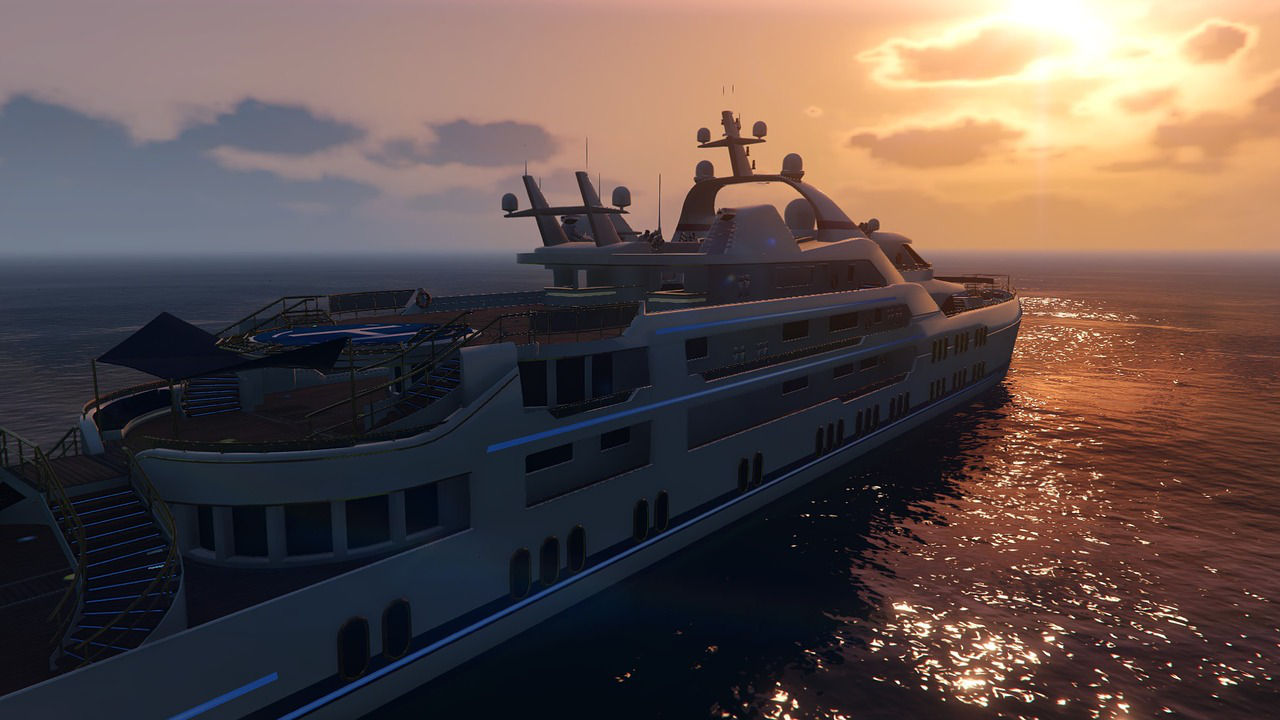

In [102]:
Image.open('ship.jpg')

In [103]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

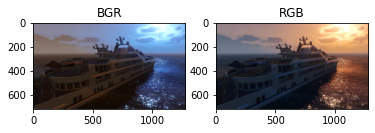

In [104]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('BGR')
plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.title('RGB')
plt.show()

**Performing Image Feature Extraction using HOG**

In [105]:
def get_rgb_image(name):
  img=cv2.imread(name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

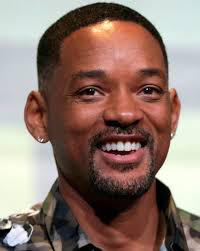

In [106]:
Image.open('will_smith.jpg')

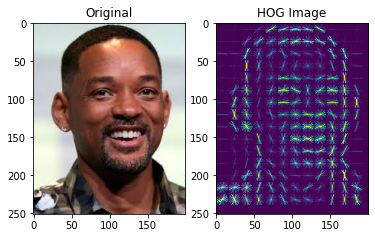

In [107]:
#Getting Hog Features

image=get_rgb_image('will_smith.jpg')

ret_,hog_image=hog(image,orientations=9,pixels_per_cell=(16,16),cells_per_block=(3,3),visualize=True,multichannel=True)
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

#Plotting both images

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(hog_image_rescaled)
plt.title('HOG Image')

plt.show()

**Generating RGB images of 3 Different Persons**

In [108]:
face_willsmith=get_rgb_image('will_smith.jpg')
face_rock=get_rgb_image('rock.jpg')
face_vindiesel=get_rgb_image('vin_diesel.jpg')

**Creating Face Encodings of These Persons**

In [109]:
faceencoding_will=fr.face_encodings(face_willsmith)[0]
faceencoding_rock=fr.face_encodings(face_rock)[0]
faceencoding_vin=fr.face_encodings(face_vindiesel)[0]

In [110]:
known_face_encodings=[faceencoding_will,faceencoding_rock,faceencoding_vin]

**creating test face encoding so for evaluation**

In [111]:
unknown_face_1=get_rgb_image('keanu_reeves.jpg')
unknown_face_encoding_1=fr.face_encodings(unknown_face)


unknown_face_2=get_rgb_image('vin_diesel_test.jpg')
unknown_face_encoding_2=fr.face_encodings(unknown_face_2)

**Let's evaluate using the unknown encodings**

The person in the image is unknown 


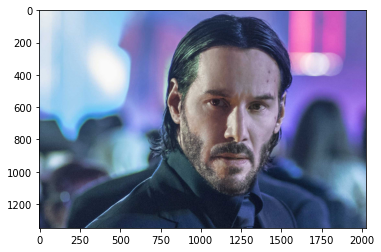

In [112]:
results=[]
for encodings in known_face_encodings:
  d=distance.euclidean(unknown_face_encoding_1,encodings)
  results.append(d)
threshold=0.6
results=np.array(results) <= threshold

name='unknown'
if results[0]:
  name='Will Smith'
if results[1]:
  name='Rock'
if results[2]:
  name='Vin Diesel'

plt.imshow(unknown_face_1)

print(f'The person in the image is {name} ')


The person in the image is Vin Diesel 


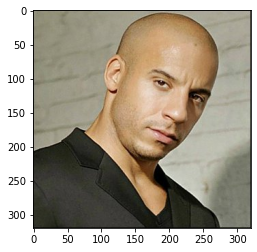

In [113]:
results=[]
for encodings in known_face_encodings:
  d=distance.euclidean(unknown_face_encoding_2,encodings)
  results.append(d)
threshold=0.6
results=np.array(results) <= threshold

name='unknown'
if results[0]:
  name='Will Smith'
if results[1]:
  name='Rock'
if results[2]:
  name='Vin Diesel'

plt.imshow(unknown_face_2)

print(f'The person in the image is {name} ')

**Let's retrieve the Facial Landmarks from Keanu Reeves Image**

In [114]:
face_landmarks_list=fr.face_landmarks(unknown_face_1)

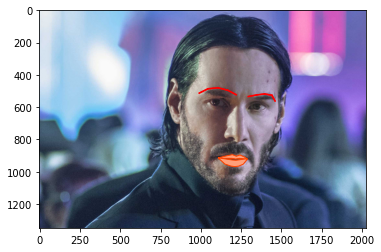

In [120]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(unknown_face_1)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y=x,y
  right_eyebrow=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow[0]
  for (x,y) in right_eyebrow[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y=x,y 
  P=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(P)
  P=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(P)
  
plt.show()
